In [345]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV

In [216]:
data = pd.read_csv('salary.csv')
threshold = 0.05 * len(data)
data_drop = data.columns[data.isna().sum() < threshold]
# data = data.dropna(axis=0)
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


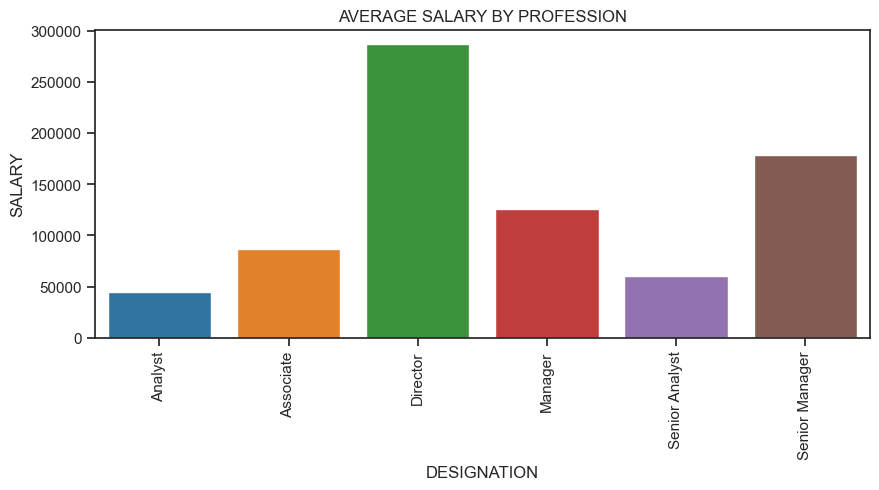

In [275]:
mean_salary = data.groupby('DESIGNATION')[['SALARY']].mean().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x=mean_salary['DESIGNATION'],y=mean_salary['SALARY'])
plt.xticks(rotation=90)
plt.title('AVERAGE SALARY BY PROFESSION')
plt.show()

<Figure size 1000x1000 with 0 Axes>

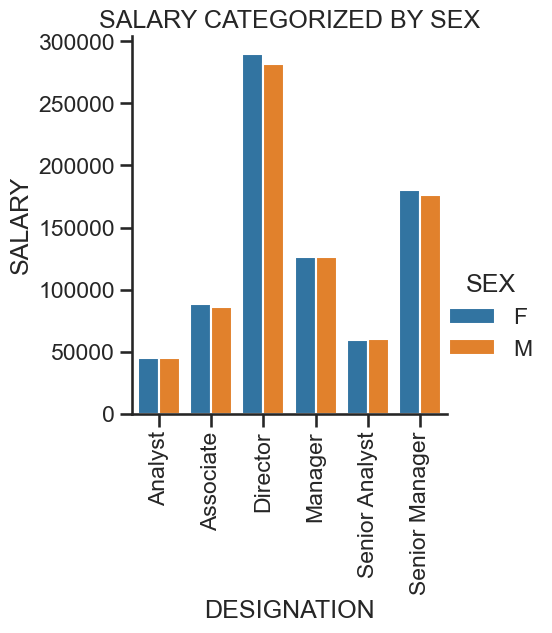

In [218]:
# gender wise salary 
gender_salary = data.groupby(['DESIGNATION','SEX'])[['SALARY']].mean().reset_index()

plt.figure(figsize=(10,10))
sns.catplot(x='DESIGNATION',y='SALARY',hue='SEX',data=gender_salary,kind='bar')
sns.set_style('darkgrid')
sns.set_style('ticks')
plt.xticks(rotation=90)
sns.set_context
plt.title('SALARY CATEGORIZED BY SEX')
plt.show()

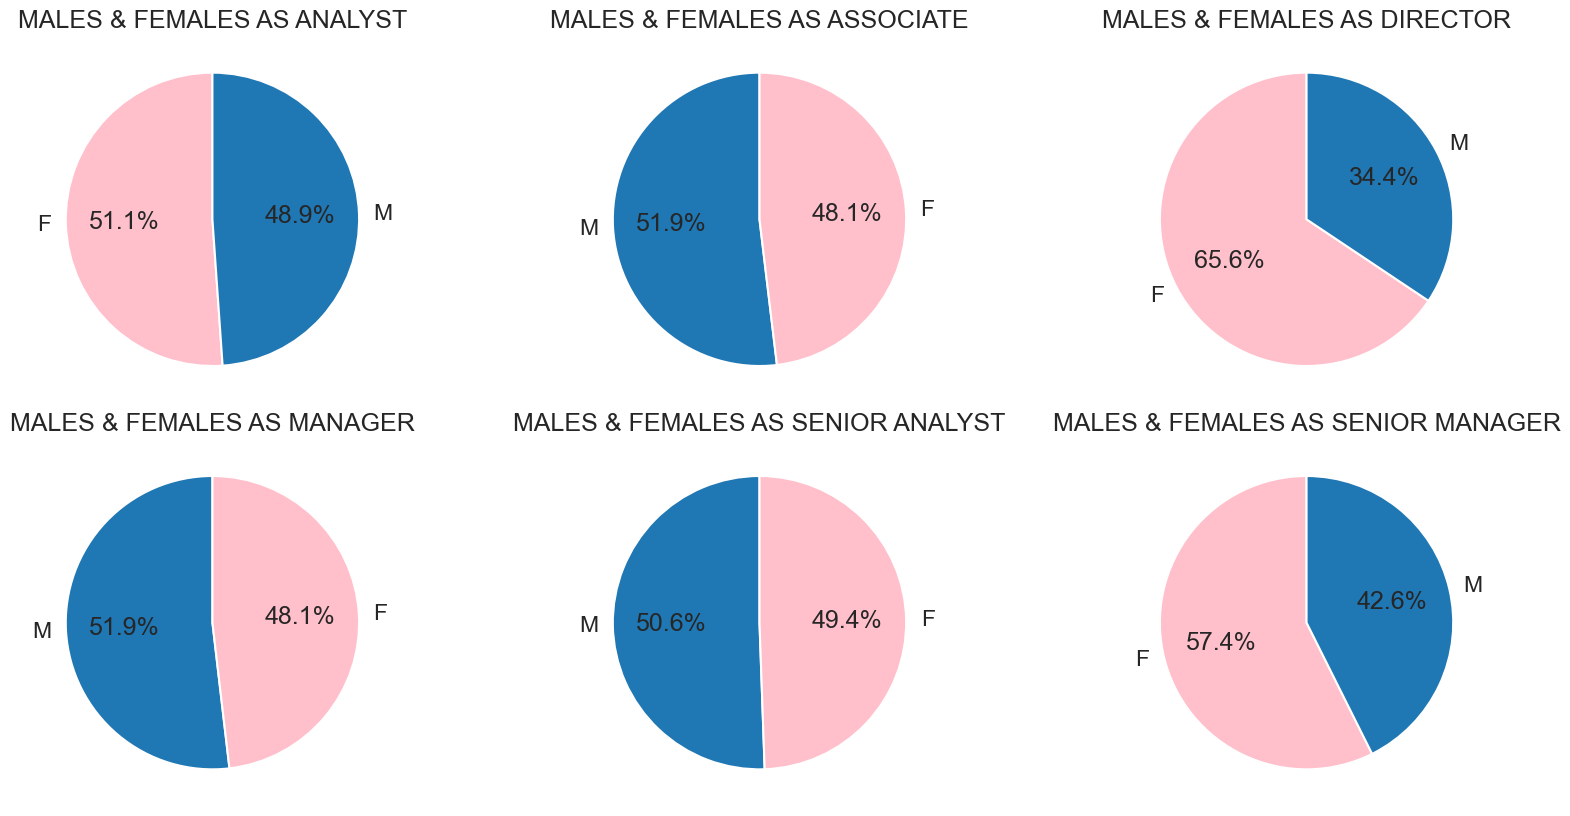

In [291]:
# gender %
gender_count = data.groupby('DESIGNATION')[['SEX']].value_counts().reset_index(name='count')
analyst = gender_count[gender_count['DESIGNATION'] == 'Analyst']
associate = gender_count[gender_count['DESIGNATION'] == 'Associate']
director = gender_count[gender_count['DESIGNATION'] == 'Director']
manager = gender_count[gender_count['DESIGNATION'] == 'Manager']
s_analyst = gender_count[gender_count['DESIGNATION'] == 'Senior Analyst']
s_manager = gender_count[gender_count['DESIGNATION'] == 'Senior Manager']

color = {'M': '#1f77b4', 'F': 'pink'}

fig,((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.set_context('talk')
plt.subplots_adjust(hspace=.1)
ax0.pie(analyst['count'],labels=analyst['SEX'],autopct='%1.1f%%', startangle=90,colors=analyst['SEX'].map(color))
ax0.set(title='MALES & FEMALES AS ANALYST')

ax1.pie(associate['count'],labels=associate['SEX'],autopct='%1.1f%%', startangle=90,colors=associate['SEX'].map(color))
ax1.set(title='MALES & FEMALES AS ASSOCIATE')

ax2.pie(director['count'],labels=director['SEX'],autopct='%1.1f%%', startangle=90,colors=director['SEX'].map(color))
ax2.set(title='MALES & FEMALES AS DIRECTOR')

ax3.pie(manager['count'],labels=manager['SEX'],autopct='%1.1f%%', startangle=90,colors=manager['SEX'].map(color))
ax3.set(title='MALES & FEMALES AS MANAGER')

ax4.pie(s_analyst['count'],labels=s_analyst['SEX'],autopct='%1.1f%%', startangle=90,colors=s_analyst['SEX'].map(color))
ax4.set(title='MALES & FEMALES AS SENIOR ANALYST')

ax5.pie(s_manager['count'],labels=s_manager['SEX'],autopct='%1.1f%%', startangle=90,colors=s_manager['SEX'].map(color))
ax5.set(title='MALES & FEMALES AS SENIOR MANAGER')
plt.show()

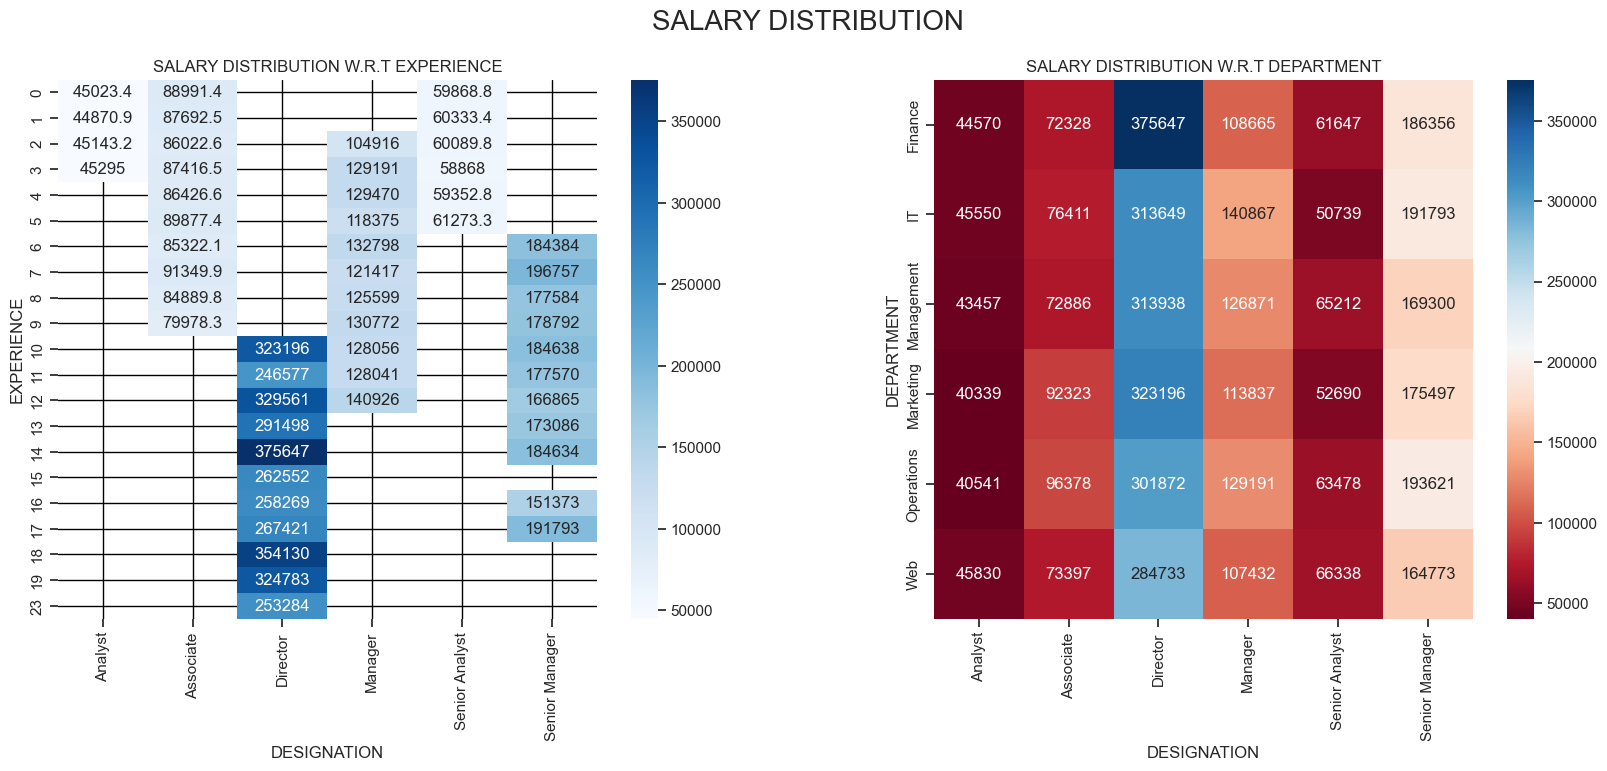

In [341]:
# relation of salary with experience and department
exp_salary= data.groupby(['DESIGNATION','PAST EXP'])['SALARY'].mean().reset_index()
unit_salary = data.groupby(['UNIT','DESIGNATION'])[['SALARY']].first().reset_index()

pivot_exp = exp_salary.pivot(index='PAST EXP',columns='DESIGNATION',values='SALARY')
pivot_unit = unit_salary.pivot(index='UNIT',columns='DESIGNATION',values='SALARY')

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.set_context('notebook')
plt.subplots_adjust(wspace=.3)

sns.heatmap(pivot_exp,annot=True,fmt='g',cmap='Blues',ax=ax0)
# sns.set_style('darkgrid')
sns.set_style('ticks')
ax0.set(title='SALARY DISTRIBUTION W.R.T EXPERIENCE')
ax0.set(ylabel='EXPERIENCE')
ax0.grid(True,color='black')

sns.heatmap(pivot_unit,annot=True,fmt='g',cmap='RdBu',ax=ax1)
sns.set_style('ticks')
ax1.set(title='SALARY DISTRIBUTION W.R.T DEPARTMENT')
ax1.set(ylabel='DEPARTMENT')

plt.suptitle('SALARY DISTRIBUTION',fontsize=20)
plt.show()

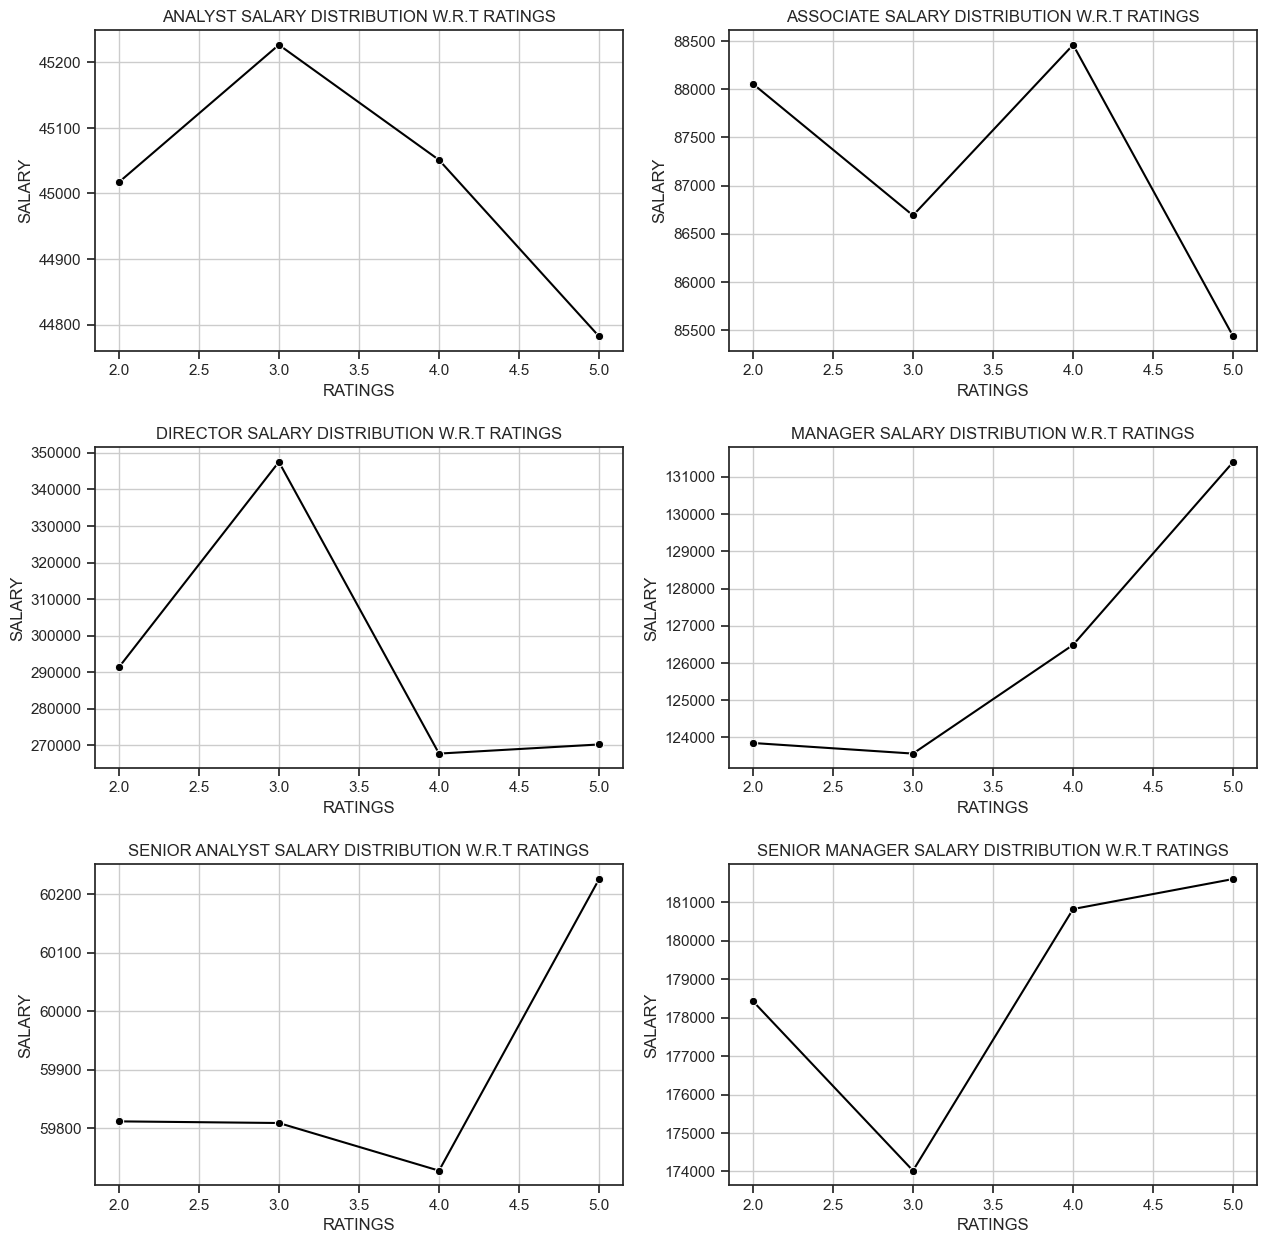

2631


In [230]:
# salary and rating relation
analyst = rating[rating['DESIGNATION'] == 'Analyst']
associate = rating[rating['DESIGNATION'] == 'Associate']
director = rating[rating['DESIGNATION'] == 'Director']
manager = rating[rating['DESIGNATION'] == 'Manager']
s_analyst = rating[rating['DESIGNATION'] == 'Senior Analyst']
s_manager = rating[rating['DESIGNATION'] == 'Senior Manager']

fig,((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sns.set_context('notebook')
plt.subplots_adjust(hspace=.3)

sns.lineplot(x=analyst['RATINGS'],y=analyst['SALARY'],marker='o',color='black',ax=ax0)
ax0.grid(True)
ax0.set(title='ANALYST SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=associate['RATINGS'],y=associate['SALARY'],marker='o',color='black',ax=ax1)
ax1.grid(True)
ax1.set(title='ASSOCIATE SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=director['RATINGS'],y=director['SALARY'],marker='o',color='black',ax=ax2)
ax2.grid(True)
ax2.set(title='DIRECTOR SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=manager['RATINGS'],y=manager['SALARY'],marker='o',color='black',ax=ax3)
ax3.grid(True)
ax3.set(title='MANAGER SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=s_analyst['RATINGS'],y=s_analyst['SALARY'],marker='o',color='black',ax=ax4)
ax4.grid(True)
ax4.set(title='SENIOR ANALYST SALARY DISTRIBUTION W.R.T RATINGS')

sns.lineplot(x=s_manager['RATINGS'],y=s_manager['SALARY'],marker='o',color='black',ax=ax5)
ax5.grid(True)
ax5.set(title='SENIOR MANAGER SALARY DISTRIBUTION W.R.T RATINGS')
plt.show()

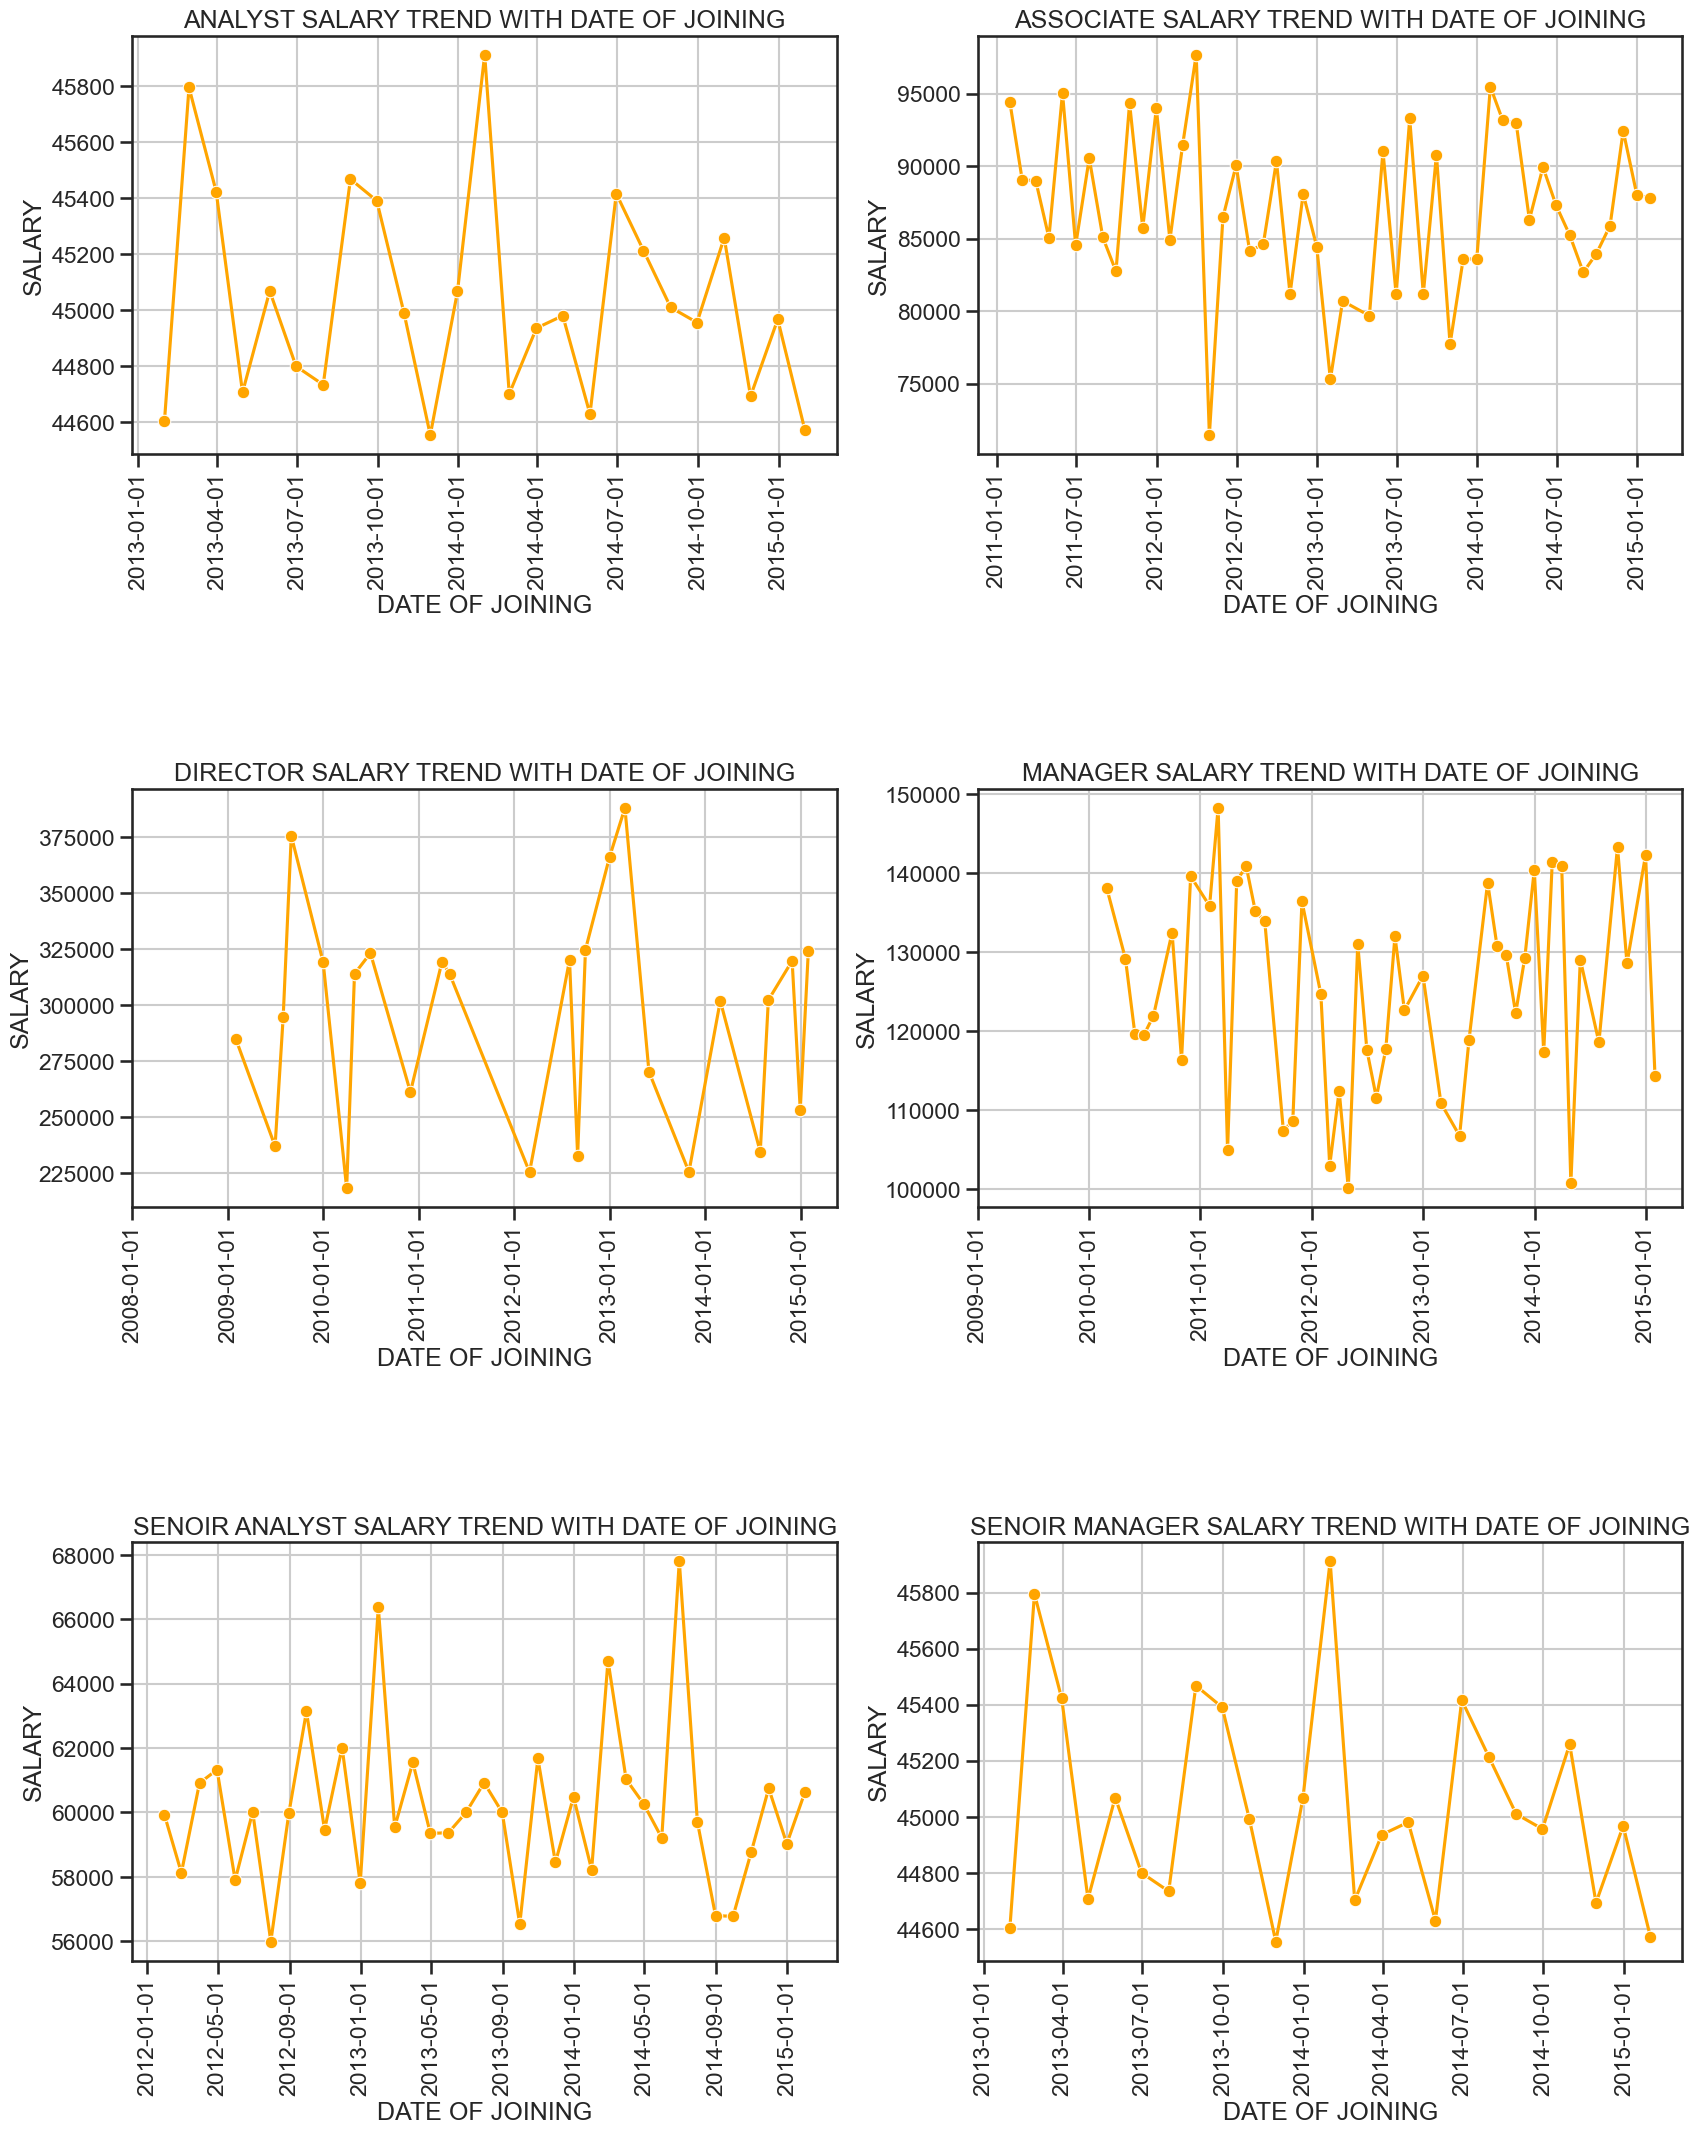

In [316]:
# time trends
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['month'] = data['DOJ'].dt.month
data['year'] = data['DOJ'].dt.year
group = data.groupby(['DESIGNATION']).resample('M',on='DOJ')['SALARY'].mean().reset_index()
group = group.dropna()

analyst = group[group['DESIGNATION'] == 'Analyst']
associate = group[group['DESIGNATION'] == 'Associate']
director = group[group['DESIGNATION'] == 'Director']
manager = group[group['DESIGNATION'] == 'Manager']
s_analyst = group[group['DESIGNATION'] == 'Senior Analyst']
s_manager = group[group['DESIGNATION'] == 'Senior Manager']

fig,((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(nrows=3,ncols=2,figsize=(20,25))
plt.subplots_adjust(hspace=.8)
sns.lineplot(x=analyst['DOJ'],y=analyst['SALARY'],marker='o',color='orange',ax=ax0)
ax0.set_xticks(ax0.get_xticks())
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax0.set(xlabel='DATE OF JOINING')
ax0.set(title='ANALYST SALARY TREND WITH DATE OF JOINING')
ax0.grid(True)

sns.lineplot(x=associate['DOJ'],y=associate['SALARY'],marker='o',color='orange',ax=ax1)
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(xlabel='DATE OF JOINING')
ax1.set(title='ASSOCIATE SALARY TREND WITH DATE OF JOINING')
ax1.grid(True)

sns.lineplot(x=director['DOJ'],y=director['SALARY'],marker='o',color='orange',ax=ax2)
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set(xlabel='DATE OF JOINING')
ax2.set(title='DIRECTOR SALARY TREND WITH DATE OF JOINING')
ax2.grid(True)

sns.lineplot(x=manager['DOJ'],y=manager['SALARY'],marker='o',color='orange',ax=ax3)
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set(xlabel='DATE OF JOINING')
ax3.set(title='MANAGER SALARY TREND WITH DATE OF JOINING')
ax3.grid(True)

sns.lineplot(x=s_analyst['DOJ'],y=s_analyst['SALARY'],marker='o',color='orange',ax=ax4)
ax4.set_xticks(ax4.get_xticks())
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set(xlabel='DATE OF JOINING')
ax4.set(title='SENOIR ANALYST SALARY TREND WITH DATE OF JOINING')
ax4.grid(True)

sns.lineplot(x=analyst['DOJ'],y=analyst['SALARY'],marker='o',color='orange',ax=ax5)
ax5.set_xticks(ax5.get_xticks())
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
ax5.set(xlabel='DATE OF JOINING')
ax5.set(title='SENOIR MANAGER SALARY TREND WITH DATE OF JOINING')
ax5.grid(True)

plt.show()

In [241]:
# missing values 
threshold = 0.05 * len(data)
columns = data.columns[data.isna().sum() < threshold]
data = data.dropna().reset_index(drop=True)
# data.isna().any()

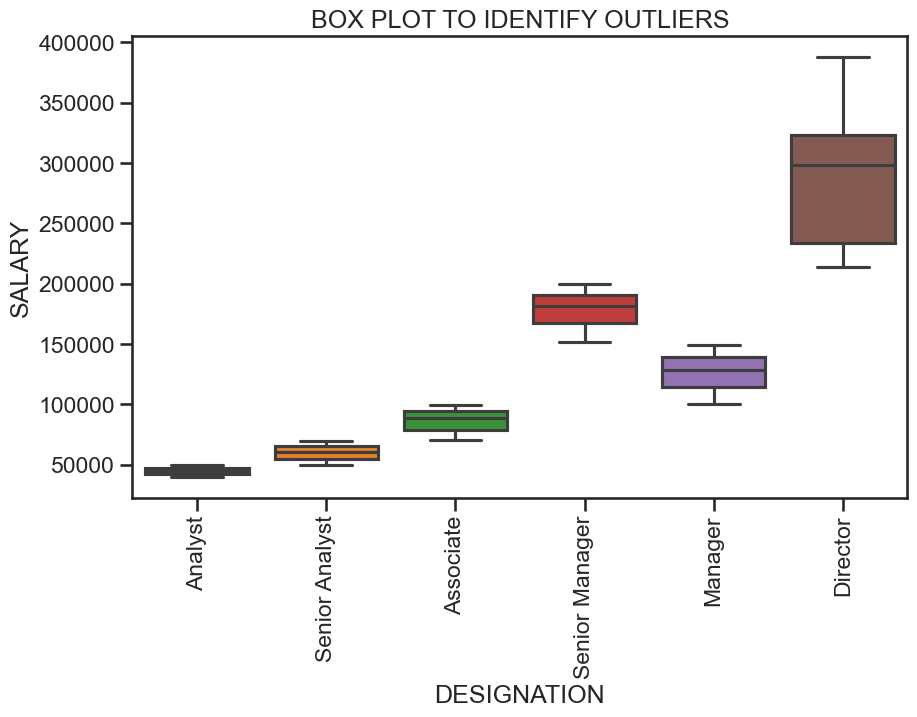

In [337]:
# outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['DESIGNATION'],y=data['SALARY'])
plt.title('BOX PLOT TO IDENTIFY OUTLIERS')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# feature selection 
